<a href="https://colab.research.google.com/github/vargopal/stockMarket/blob/F455--Quant-Finance/FactorRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


Gene Fama won the Nobel Price in economics for his work on the efficient markets theory.

In [ ]:
import pandas_datareader as pdr

In [ ]:
ff = pdr.get_data_famafrench('F-F_Research_Data_Factors', 1926)


{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2022-08   -3.77  1.39  0.31  0.19
 2022-09   -9.35 -0.82  0.03  0.19
 2022-10    7.83  0.10  8.05  0.23
 2022-11    4.60 -3.40  1.39  0.29
 2022-12   -6.41 -0.64  1.36  0.33
 
 [1158 rows x 4 columns], 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2018   -6.95  -3.21  -9.73  1.83
 2019   28.28  -6.10 -10.34  2.15
 2020   23.66  13.17 -46.57  0.45
 2021   23.56  -3.92  25.57  0.04
 2022  -21.60  -6.79  25.85  1.43
 
 [96 rows x 4 columns], 'DESCR': 'F-F Research Data Factors\n-------

In [ ]:
type(ff)

dict

In [ ]:
ff.keys()

dict_keys([0, 1, 'DESCR'])

In [ ]:
print(ff['DESCR'])

F-F Research Data Factors
-------------------------

This file was created by CMPT_ME_BEME_RETS using the 202212 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2022 Kenneth R. French

  0 : (1158 rows x 4 cols)
  1 : Annual Factors: January-December (96 rows x 4 cols)


In [ ]:
ff = ff[0]

ff

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31
...,...,...,...,...
2022-08,-3.77,1.39,0.31,0.19
2022-09,-9.35,-0.82,0.03,0.19
2022-10,7.83,0.10,8.05,0.23


rf is a risk free rate. Usually, rf is a US treasury because the US can print its own money can raise taxes so that it is likely to default on its debt.

What is the importance of book to market?
Low book to market is a growth firm. High book to market is a value firm.

The trend is that value firms have greater size than growth firms.

In [ ]:
ff = ff.rename({'Mkt-RF':'RMRF'}, axis='columns')
ff = ff / 100
ff.describe()

,RMRF,SMB,HML,RF
count,1158.000000,1158.000000,1158.000000,1158.000000
mean,0.006677,0.001893,0.003608,0.002663
std,0.053534,0.031693,0.035625,0.002516
min,-0.291300,-0.172300,-0.139700,-0.000600
25%,-0.020150,-0.016000,-0.013875,0.000300
50%,0.010600,0.000800,0.001300,0.002200
75%,0.036500,0.017575,0.017600,0.004200
max,0.388500,0.365600,0.356100,0.013500


In [ ]:
#Annual return
12 * ff.mean()

RMRF    0.080130
SMB     0.022714
HML     0.043294
RF      0.031952
dtype: float64

In [ ]:
# Volatility annually
np.sqrt(12) * ff.std()

RMRF    0.185449
SMB     0.109789
HML     0.123408
RF      0.008715
dtype: float64

In [ ]:
# Sharpe ratio is a value that represent the return against overall volatility
ff.mean()/ff.std()

RMRF    0.124732
SMB     0.059723
HML     0.101274
RF      1.058382
dtype: float64

Sharpe ratio for risk free rate is 0 because the sharpe ratio needs to subtract the risk free rate.

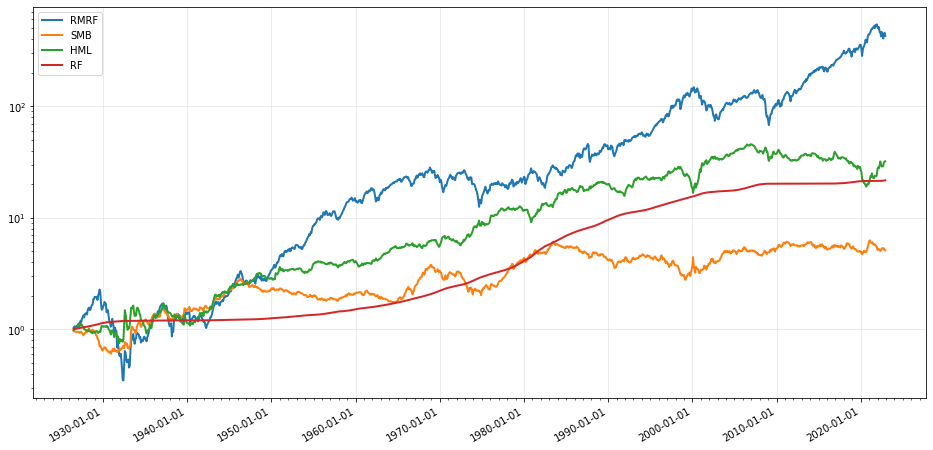

In [ ]:
fig, ax = plt.subplots()

(1+ff).cumprod().plot(figsize=(16,8), lw=2, ax=ax, logy=True, xlabel='', x_compat=True)

# (1+ff).cumprod().plot(figsize=(16,8), lw=2, ax=ax, logy=True, xlabel='')

# change year locations
from matplotlib.dates import YearLocator
ax.xaxis.set_major_locator(YearLocator(10))
ax.xaxis.set_minor_locator(YearLocator(1))

ax.grid(alpha=0.3)
ax.legend(loc='upper left')
plt.show()